In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random, warnings
from sklearn.datasets import load_iris
from IPython.display import display_html
warnings.filterwarnings("ignore")

**Loading Titanic and Iris Data**

In [44]:
iris_data = sns.load_dataset("iris")
titanic =  pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df1_styler = iris_data.head().style.set_table_attributes("style='display:inline'").set_caption('Iris Data ') ## stackoverflow copied for styling side by side
df2_styler = titanic.head().drop(columns=["Name","Ticket","Cabin","Embarked"],axis=1).style.set_table_attributes("style='display:inline'").set_caption('Titanic Data')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(),raw=True)

Iris Data 
 
 
   
 sepal_length 
 sepal_width 
 petal_length 
 petal_width 
 species 
 
 
 
 
 0 
 5.100000 
 3.500000 
 1.400000 
 0.200000 
 setosa 
 
 
 1 
 4.900000 
 3.000000 
 1.400000 
 0.200000 
 setosa 
 
 
 2 
 4.700000 
 3.200000 
 1.300000 
 0.200000 
 setosa 
 
 
 3 
 4.600000 
 3.100000 
 1.500000 
 0.200000 
 setosa 
 
 
 4 
 5.000000 
 3.600000 
 1.400000 
 0.200000 
 setosa 
 
 
 

 
 Titanic Data 
 
 
   
 PassengerId 
 Survived 
 Pclass 
 Sex 
 Age 
 SibSp 
 Parch 
 Fare 
 
 
 
 
 0 
 1 
 0 
 3 
 male 
 22.000000 
 1 
 0 
 7.250000 
 
 
 1 
 2 
 1 
 1 
 female 
 38.000000 
 1 
 0 
 71.283300 
 
 
 2 
 3 
 1 
 3 
 female 
 26.000000 
 0 
 0 
 7.925000 
 
 
 3 
 4 
 1 
 1 
 female 
 35.000000 
 1 
 0 
 53.100000 
 
 
 4 
 5 
 0 
 3 
 male 
 35.000000 
 0 
 0 
 8.050000

##  Which Features to Choose ?
**Just see below the plots `petal_width ` and `petal_length` are able to categorize data more efficiently thus they are good choice**

<Axes: title={'center': 'petal_width'}, xlabel='petal_width', ylabel='Density'>

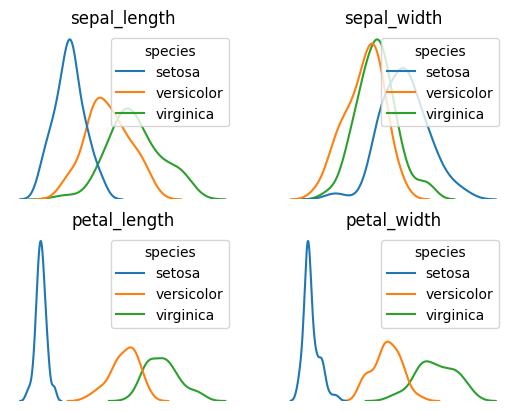

In [45]:
fig , axes =  plt.subplots(2,2)

axes[0,0].set_title("sepal_length")
axes[0,1].set_title("sepal_width")
axes[1,0].set_title("petal_length")
axes[1,1].set_title("petal_width")

axes[0,0].axis("off") ; axes[0,1].axis("off") ; axes[1,0].axis("off") ; axes[1,1].axis("off")


sns.kdeplot(data=iris_data,x="sepal_length",hue="species",ax=axes[0,0])
sns.kdeplot(data=iris_data,x="sepal_width",hue="species",ax=axes[0,1])
sns.kdeplot(data=iris_data,x="petal_length",hue="species",ax=axes[1,0])
sns.kdeplot(data=iris_data,x="petal_width",hue="species",ax=axes[1,1])

## Converting Data to Standard Normal Variate

**Just see below data you will notce that males of younger age died more than old one whereas old male and old female died at same rate but still males died more**

<Axes: xlabel='Age', ylabel='Density'>

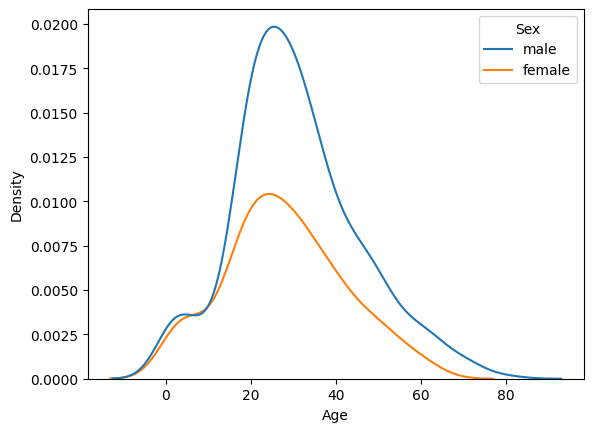

In [46]:
sns.kdeplot(data=titanic,x="Age",hue="Sex")

**N ~ (0,1)**
**Converting data to standard normal variate**

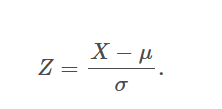

**Notice Below the data is centered at 0**

<Axes: xlabel='Age', ylabel='Density'>

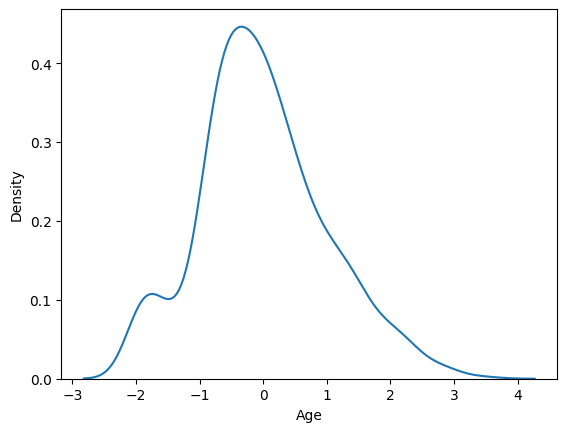

In [47]:
mu = 0
sigma =  1

x =  (titanic["Age"] -  titanic["Age"].mean()) /  titanic["Age"].std()
sns.kdeplot(x)


## Detecting OUTLIERS

**Majoirty of data lies in the range of μ + 3𝜎**

Screenshot 2025-06-05 152210.png


In [49]:

age_last = titanic["Age"].mean() +  3 * titanic["Age"].std()
print(f"Age Greater than {age_last} is outliers")

Age Greater than 73.27860964406095 is outliers


In [51]:
titanic[titanic["Age"] > 73] ##outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S
